In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv('student_marks.csv')

In [3]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [4]:
df.shape

(200, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0.5, 1.0, 'Scatter Plot of Students Study Hours vs Students marks')

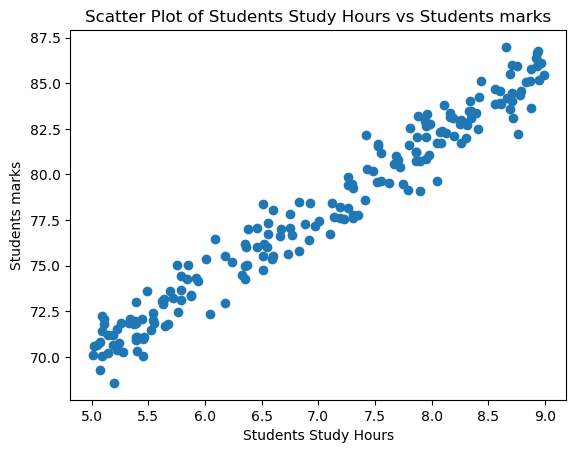

In [7]:
plt.scatter(df.study_hours, df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")

In [9]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [10]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [11]:
df2 = df.fillna(df.mean())

In [12]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [14]:
X = df2.drop("student_marks", axis = "columns")
y = df2.drop("study_hours", axis = "columns")

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=3) #, random_state=51

In [16]:
X_train.shape

(160, 1)

In [17]:
y_train

,student_marks
156,83.37
115,74.44
155,70.20
15,76.03
61,79.41
...,...
0,78.50
184,71.50
131,71.86
152,81.70


In [18]:
X_test

,study_hours
40,5.280000
51,7.310000
139,8.600000
197,8.940000
170,5.190000
82,6.660000
183,8.610000
46,7.010000
70,5.370000
100,6.240000


In [19]:
y_test

,student_marks
40,70.27
51,77.77
139,83.91
197,86.75
170,71.18
82,76.63
183,83.87
46,77.46
70,71.80
100,75.18


In [20]:
# y = m * x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
lr.coef_

array([[3.87141669]])

In [22]:
lr.intercept_

array([50.83451149])

In [23]:
m = 3.90670797
c = 50.65512483
y  = m * 40 + c 
y

206.92344363

In [24]:
lr.predict([[6.83]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[77.2762875]])

In [25]:
y_pred  = lr.predict(X_test)
y_pred

array([[71.27559163],
       [79.13456752],
       [84.12869505],
       [85.44497673],
       [70.92716412],
       [76.61814666],
       [84.16740922],
       [77.97314251],
       [71.62401913],
       [74.99215165],
       [78.94099668],
       [74.10172581],
       [81.65098837],
       [73.25001414],
       [81.2638467 ],
       [71.04330663],
       [74.41143915],
       [72.78544414],
       [85.36754839],
       [71.70144746],
       [82.54141421],
       [76.03743416],
       [80.83799086],
       [76.65686083],
       [84.36098005],
       [79.09585335],
       [75.53414999],
       [77.91874414],
       [81.6122742 ],
       [73.59844164],
       [85.21269172],
       [70.23030912],
       [79.98627919],
       [84.59326505],
       [72.5918733 ],
       [83.97383838],
       [84.39969422],
       [75.41800749],
       [82.81241337],
       [85.48369089]])

In [26]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,5.280000,70.27,71.275592
1,7.310000,77.77,79.134568
2,8.600000,83.91,84.128695
3,8.940000,86.75,85.444977
4,5.190000,71.18,70.927164
5,6.660000,76.63,76.618147
6,8.610000,83.87,84.167409
7,7.010000,77.46,77.973143
8,5.370000,71.80,71.624019
9,6.240000,75.18,74.992152


## Fine-tune your model

In [27]:
lr.score(X_test,y_test)

0.9645118422627414

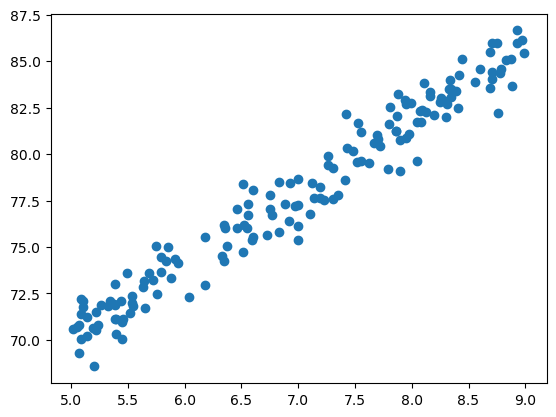

In [28]:
plt.scatter(X_train,y_train)

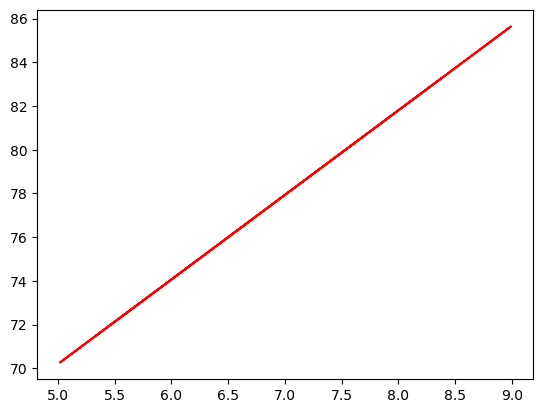

In [29]:
plt.plot(X_train, lr.predict(X_train), color = "r")